https://docs.streamlit.io/develop/api-reference/text

In [1]:
# Importar librerías necesarias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle
import logging
logger = logging.getLogger()
logger.setLevel(logging.ERROR)
from sklearn.datasets import load_iris


In [2]:
# Cargar el dataset Iris
iris = load_iris()

In [10]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
print(iris_df.agg(['min', 'max']))
print()
q1= iris_df.quantile(0.25)
q3= iris_df.quantile(0.75)
iqr = q3 - q1
lower_range = q1-(1.5*iqr)
upper_range = q3+(1.5*iqr)
print(f'upper: {upper_range}')
print()
print(f'lower: {lower_range}')


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
min                4.3               2.0                1.0               0.1
max                7.9               4.4                6.9               2.5

upper: sepal length (cm)     8.35
sepal width (cm)      4.05
petal length (cm)    10.35
petal width (cm)      4.05
dtype: float64

lower: sepal length (cm)    3.15
sepal width (cm)     2.05
petal length (cm)   -3.65
petal width (cm)    -1.95
dtype: float64


Precisión del modelo en el conjunto de prueba: 0.96


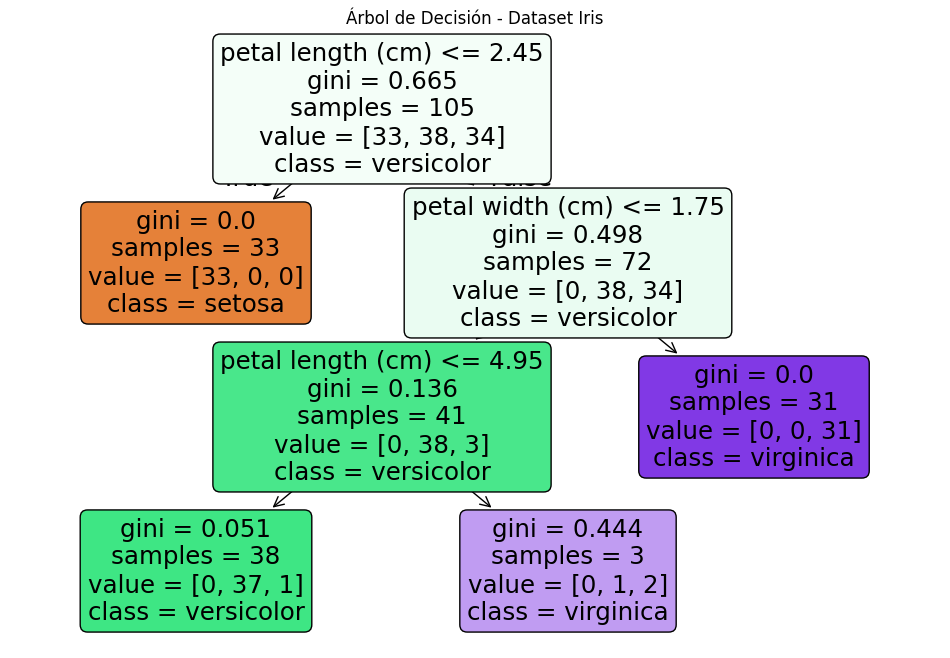

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



In [3]:

X = iris.data  # Características (features)
y = iris.target  # Etiquetas (targets)

# Dividir los datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2025)

# Crear el modelo de Árbol de Decisión
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=2025)

# Entrenar el modelo
decision_tree.fit(X_train, y_train)

# Evaluar el modelo
accuracy = decision_tree.score(X_test, y_test)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy:.2f}")

# Visualizar el Árbol de Decisión
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Árbol de Decisión - Dataset Iris")
plt.show()

# Exportar la estructura del árbol como texto
tree_rules = export_text(decision_tree, feature_names=iris.feature_names)
print(tree_rules)


In [4]:



# Supongamos que clf_gb_cv y X_train ya están definidos. Si no, inicialízalos con valores de prueba.
#clf_gb_cv = "GradientBoostingModel"  # Este es solo un ejemplo, reemplaza con tu modelo real.
X_train = {"columns": ['feature1', 'feature2', 'feature3']}  # Reemplaza con tu conjunto real de entrenamiento.

# Crear un diccionario con los detalles del modelo
model_dict = {
    'model': decision_tree,
    'predictors': X_train['columns'],
    'algorithm_name': 'decision_tree',
    'metrics': 'accuracy:0.99, f1 score:0.79',
    'author': 'ERR',
    'classes': ''
}

# Crear la ruta del archivo
output_dir = '../models'
output_file = 'model.pkl'

try:
    # Asegurarse de que el directorio existe
    os.makedirs(output_dir, exist_ok=True)

    # Guardar el modelo en un archivo pickle
    with open(os.path.join(output_dir, output_file), 'wb') as file:
        pickle.dump(model_dict, file)
        print("El modelo se guardó correctamente en:", os.path.join(output_dir, output_file))
except Exception as e:
    logger.error(f"Ha ocurrido un error: {e}")


El modelo se guardó correctamente en: ../models/model.pkl


In [5]:
with open('../models/model.pkl', 'rb') as file:
    modelx = pickle.load(file)

In [6]:
modelx

{'model': DecisionTreeClassifier(max_depth=3, random_state=2025),
 'predictors': ['feature1', 'feature2', 'feature3'],
 'algorithm_name': 'decision_tree',
 'metrics': 'accuracy:0.99, f1 score:0.79',
 'author': 'ERR',
 'classes': ''}

In [7]:
predict_df = pd.DataFrame({'sepal_length_cm':[4.7], 'sepal_width_cm':[3.2], 'petal_length_cm':[1.3], 'petal_width_cm':[0.2]})
predict_df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,4.7,3.2,1.3,0.2


In [8]:
modelx['model'].predict(predict_df)

/workspaces/4GEEKS_CLASSES/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0])